# Multicolor
Use a THStack to show a 2-D hist with cells with different colors.
```cpp
 root > .x multicolor.C
 root > .x multicolor.C(1)
```



**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:55 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TH2.h"
#include "THStack.h"
#include "TRandom.h"

 Arguments are defined. 

In [2]:
Int_t isStack=0;

In [3]:
TCanvas *c1 = new TCanvas;
Int_t nbins = 20;
TH2F *h1 = new TH2F("h1","h1",nbins,-4,4,nbins,-4,4);
h1->SetFillColor(kBlue);
TH2F *h2 = new TH2F("h2","h2",nbins,-4,4,nbins,-4,4);
h2->SetFillColor(kRed);
TH2F *h3 = new TH2F("h3","h3",nbins,-4,4,nbins,-4,4);
h3->SetFillColor(kYellow);
THStack *hs = new THStack("hs","three plots");
hs->Add(h1);
hs->Add(h2);
hs->Add(h3);
TRandom r;
Int_t i;
for (i=0;i<20000;i++) h1->Fill(r.Gaus(),r.Gaus());
for (i=0;i<200;i++) {
   Int_t ix = (Int_t)r.Uniform(0,nbins);
   Int_t iy = (Int_t)r.Uniform(0,nbins);
   Int_t bin = h1->GetBin(ix,iy);
   Double_t val = h1->GetBinContent(bin);
   if (val <= 0) continue;
   if (!isStack) h1->SetBinContent(bin,0);
   if (r.Rndm() > 0.5) {
      if (!isStack) h2->SetBinContent(bin,0);
      h3->SetBinContent(bin,val);
   } else {
      if (!isStack) h3->SetBinContent(bin,0);
      h2->SetBinContent(bin,val);
   }
}
hs->Draw("lego1");

Draw all canvases 

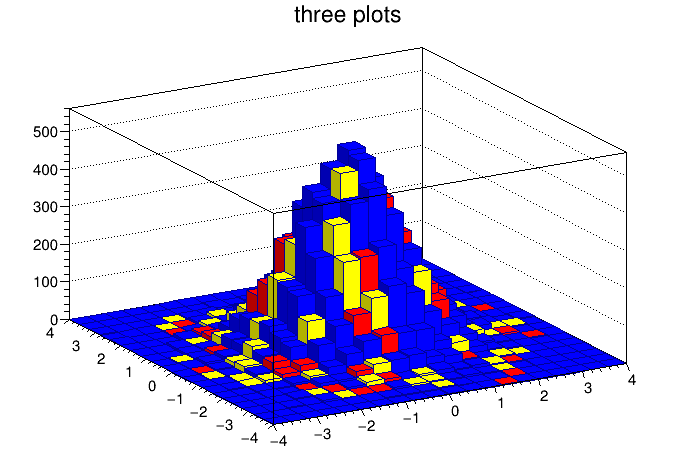

In [4]:
gROOT->GetListOfCanvases()->Draw()